# 1. Import the Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats
from sklearn import preprocessing

# 2.read the data as a data frame

In [2]:
df=pd.read_csv("../Project1/insurance.csv")

# 3.a. Shape of the data

In [6]:
df.shape

(1338, 7)

# 3.b Datatype of each attribute

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3.c Checking the presence of missing values

In [10]:
df.isnull()   # 0 result means there is no null values
df.isnull().sum().sum()  #use the below statement to get the total count of missing value

0

In [62]:
df.info()  #to see the non null values in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3.d. 5 point summary of numerical attributes
There are three numerical columns i.e age,bmi,charges
5 point summary-> min,25%,mean(50%),75%,max

In [4]:
df.describe()  #'Charges' - is highly skewed as mean is way larger than the median(central Value).

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
to show the univariate distribution we can either use "distplot" or "histogram"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128dea310>]],
      dtype=object)

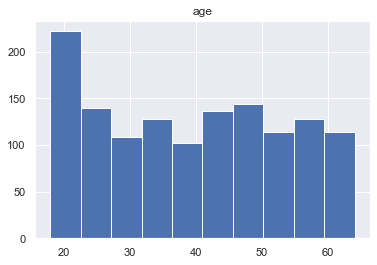

In [32]:
df.hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128ecf3d0>]],
      dtype=object)

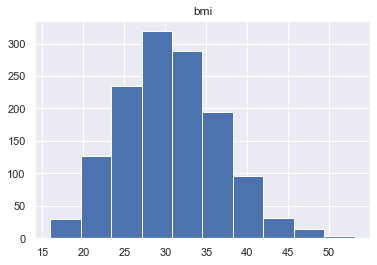

In [33]:
# bmi distribution
df.hist(column='bmi') #bmi' looks quiet normally distributed; 'charges' are highly skewed.

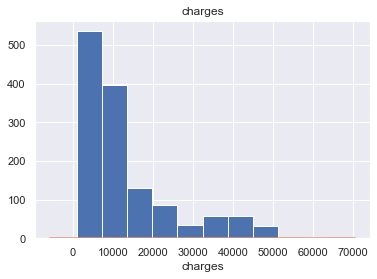

In [43]:
# chARGES distribution
df.hist(column='charges')
sns.distplot(df['charges'])

# 3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [38]:
df.skew(axis = 0, skipna = True)  # skew for the numerical columns

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# 3.g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
#We can use box plot to show the extreme values that don't lie in the 1.5QRs of the lower and upper quartile

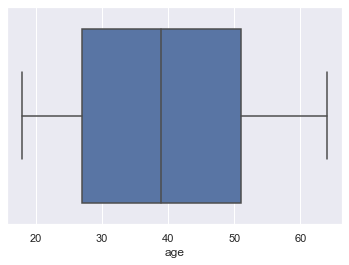

In [40]:
sns.boxplot(x=df['age'])


from the graph we can see that there is no outliers for "age" columns

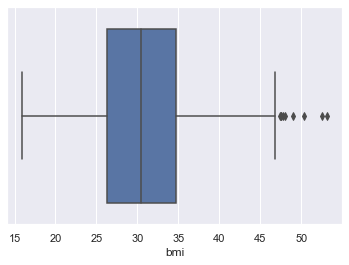

In [41]:
sns.boxplot(x=df['bmi'])
#"bmi" column has 7 outliers in the range between 45 to 55 as these data points are not in the box quartile range

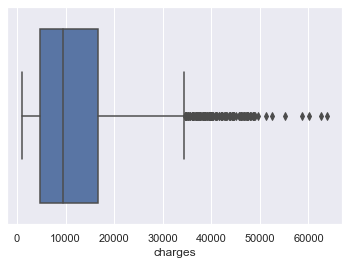

In [42]:
sns.boxplot(x=df['charges'])
#'charges' column has many outliers between the range of 3000 to 7000 which are not in the box plot quartiles range

# 3.h. Distribution of categorical columns (include children)

To plot the distribution of categorical data we can use either bar plor using the total value counts or by using  count plot

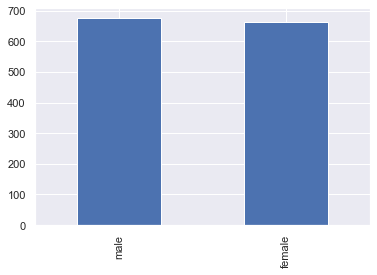

In [26]:
df['sex'].value_counts().plot(kind='bar')
#Gender is evenly distributed; Lot of non-smokers compared to smokers in the data.

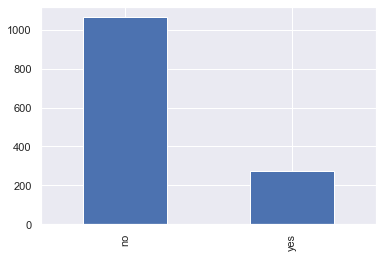

In [27]:
df['smoker'].value_counts().plot(kind='bar')
#more non smoker as comare to smoekrs

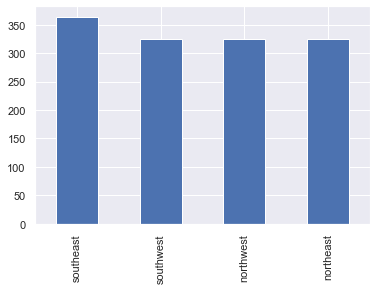

In [19]:
df['region'].value_counts().plot(kind='bar')

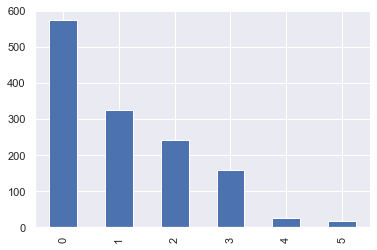

In [20]:
df['children'].value_counts().plot(kind='bar')

# 3.i. Pair plot that includes all the columns of the data frame

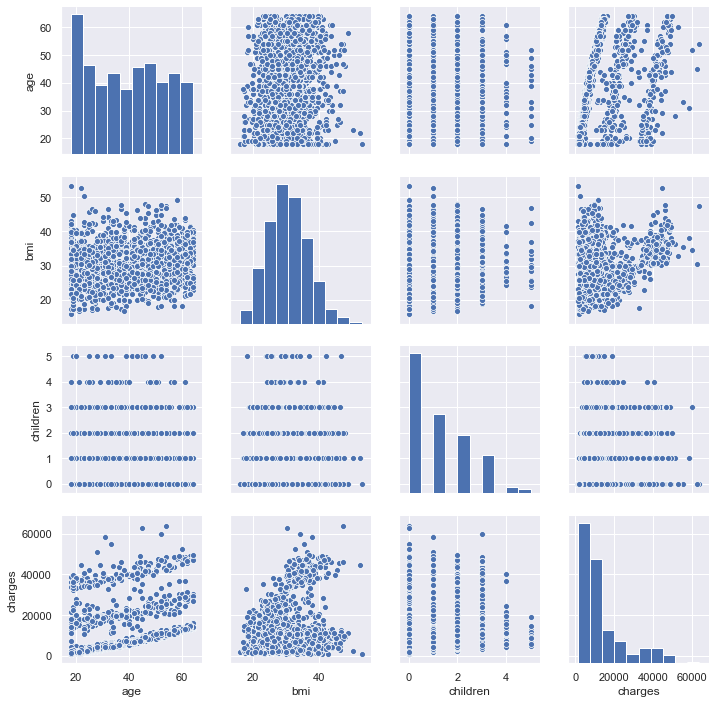

In [61]:
sns.pairplot(df)
# One could have easily state that presence of multiple gaussians can signify the possibility of mixing of data from different processes into one single data file or
#this could be even valid if this nature of the data is just due to a statistical fluke, 
#which can only be confirmed true or false by applying Statistical sampling tests such as two-way T-test or two-Sample T-test

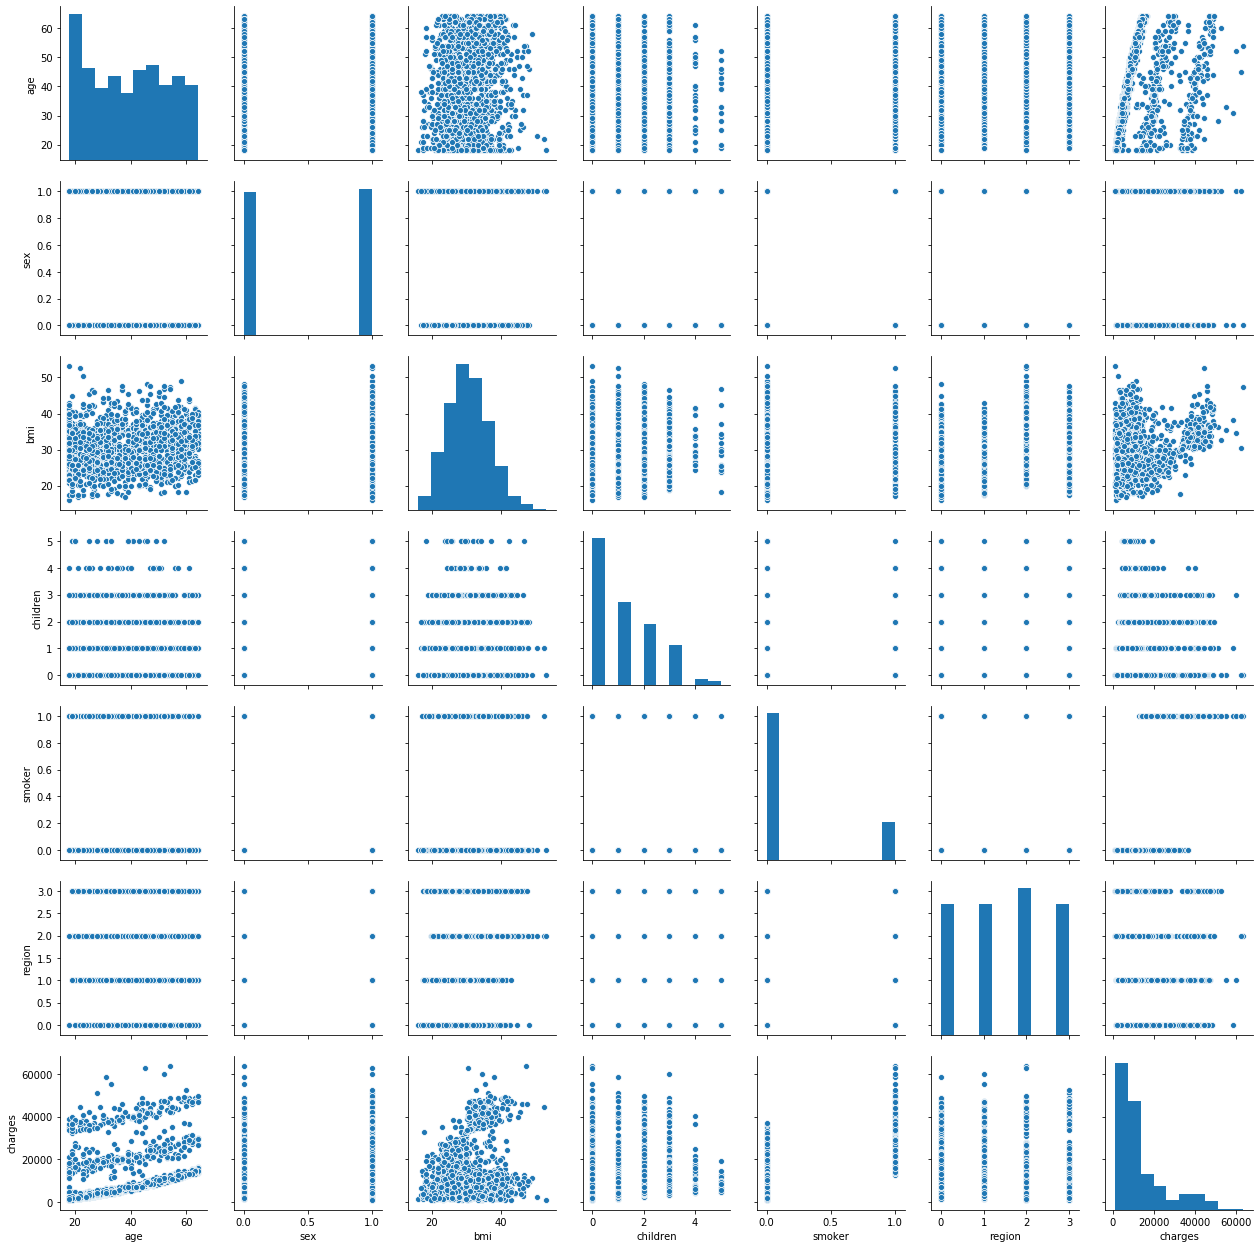

In [7]:
df.loc[:,['sex', 'smoker', 'region']] = df.loc[:,['sex', 'smoker', 'region']].apply(preprocessing.LabelEncoder().fit_transform ) 
sns.pairplot(df) 
plt.show() 

In [64]:
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

# 4.a.Do charges of people who smoke differ significantly from the people who don't? 

In [28]:
smokersdf=df[df['smoker']=='yes']  #Data set for smokers
nonsmokersdf=df[df['smoker']=='no']  #Data set for the non smokers

In [22]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


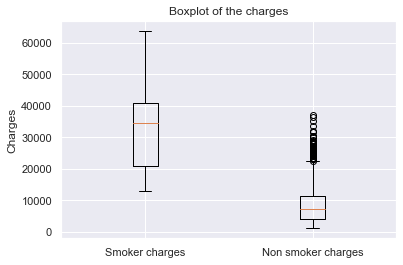

In [14]:
plt.boxplot([smokersdf['charges'].dropna(), nonsmokersdf['charges']], labels = ["Smoker charges", "Non smoker charges"])
plt.ylabel("Charges")
plt.title('Boxplot of the charges')
plt.show()

From the above graph we can see that the average charges for non smokers is very less than to the smoker changes.
also non smokers charges have multiple outliers as well.

In [8]:
nonsmokersdf['charges'].skew()

1.5381200362088077

Text(0.5, 1.0, 'Smokers charges histogram')

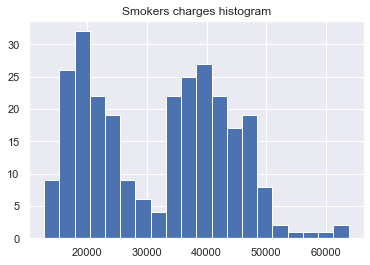

In [9]:
plt.hist(smokersdf['charges'], bins = 20)
plt.title('Smokers charges histogram')

Text(0.5, 1.0, 'Non-smokers charges histogram')

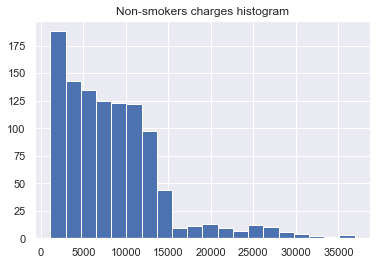

In [10]:
plt.hist(nonsmokersdf['charges'], bins = 20)
plt.title('Non-smokers charges histogram')

From both the graphs we can see that there is significant difference on the charges for smoker and non smokers
To fact the above results, we will use z-test (since we have more than 30 observation in both population)


# Hypothesis Testing using z-test
Null H0: charges are same for smokers and non smokers

Alternative hypothesis H1 :  charges are not same

In [29]:
z, pval = weightstats.ztest(smokersdf['charges'],nonsmokersdf['charges'])
z,pval

(46.664921172723716, 0.0)

In [30]:
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. So we reject the null')
else:
    print(f'With a p-value of {pval} the difference is not significant. so we fail to reject the null')

With a p-value of 0.0 the difference is significant. So we reject the null


# Conclusion:
we are rejecting the null hypothesis means there is significant difference in the charges for smokers and non smokers
and this turned out in the favour of our above study. 

# 4.b. Does bmi of males differ significantly from that of females?

In [32]:
#let's create two data frames for males and females
males_df=df[df['sex']=='male']
females_df=df[df['sex']=='female']
print(f"df shape for male = {males_df.shape} and for female is = {females_df.shape}")

df shape for male = (676, 7) and for female is = (662, 7)


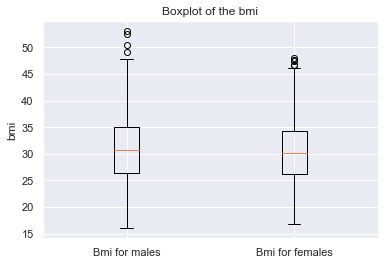

In [22]:
#Let's draw a box plot to see if bmi is having the statistically significant effect 
plt.boxplot([males_df['bmi'],females_df['bmi']],labels=["Bmi for males","Bmi for females"])
plt.ylabel("bmi")
plt.title("Boxplot of the bmi")
plt.show()

From above graph we can see that both are asymmetrical and average is also similar for both with multiple outliers.

Text(0.5, 1.0, 'male bmis histogram')

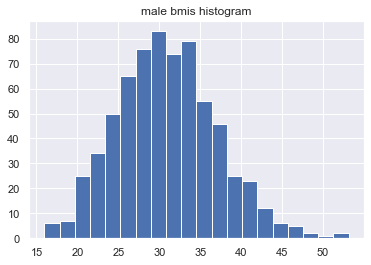

In [33]:
plt.hist(males_df['bmi'],bins=20)
plt.title("male bmis histogram")

Text(0.5, 1.0, 'female bmis histogram')

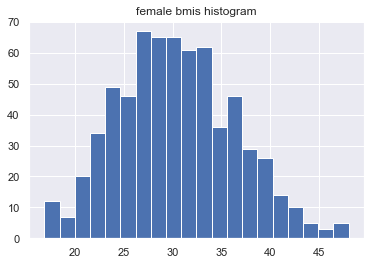

In [34]:
plt.hist(females_df['bmi'],bins=20)
plt.title("female bmis histogram")

from histogram , we can see that there is very less difference between the bmi for males and females

# Hypothesis
Null hypothesis Ho: bmi is same for male and female

Alternative hypothesis Ha: bmi is not same for male and female

In [33]:
z, pval = weightstats.ztest(males_df['bmi'],females_df['bmi'])
z,pval
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. So we reject the null')
else:
    print(f'With a p-value of {pval} the difference is not significant. so we fail to reject the null')

With a p-value of 0.08974343679943912 the difference is not significant. so we fail to reject the null


# Conclusion:
we are accepting the null hypothesis means there is no significant diffrenece in the bmi for males and females
and this turned out in the favour of our above study.

# 4. c. Is the proportion of smokers significantly different in different genders?

In [53]:
male_smokers=df[df['sex']=='male'].smoker.value_counts()[1]       #male smokers count
female_smokers=df[df['sex']=='female'].smoker.value_counts()[1]   #female smokers count
total_males=df.sex.value_counts()[0]     #total numbers of males in the data
total_females=df.sex.value_counts()[1]   #total numbers of females in the data

In [54]:
print(f' female and male smoker count : {[female_smokers,male_smokers]}, female and male count: {[total_females,total_males]} respectively')
print(f' Proportion of smokers in females, males = {round(female_smokers/total_females,2)}%, {round(male_smokers/total_males,2)}% respectively')

 female and male smoker count : [115, 159], female and male count: [662, 676] respectively
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


From the above rsults , we can see that proportion are different for male and female smokers 

# Hypothesis
Null hypothesis Ho: proportion of smokers is same in male and female
    
Alternative hypothesis Ha: proportion of smokers is not same in male and female
    
to test this, we will use the proportion ztest

In [63]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [total_females, total_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. so we reject the null')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. so We fail to reject the null')

With a p-value of 0.0053 the difference is significant. so we reject the null


# Conclusion
With p value is less than the significance level(5%),we accept the alternative hypothesis and can state that proportion of smokers is significantly different in males and females.


# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same?

Since here we need to test the more than two population means so we use "ANOVA test"  instead of z-test to examine the equality with the sample mean

In [22]:
df.head(5)
Nochild_women_df=df[(df['sex']=='female') & (df['children']==0)][['bmi','children']]  #women with no child data
onechild_women_df=df[(df['sex']=='female') & (df['children']==1)][['bmi','children']]  #women with one child data
twochild_women_df=df[(df['sex']=='female') & (df['children']==2)][['bmi','children']]   #women with two child data
#appending the whole data frame to create single data frame with bmis for different children
women_df=pd.DataFrame()
women_df=women_df.append(Nochild_women_df)
women_df=women_df.append(onechild_women_df)
women_df=women_df.append(twochild_women_df)
women_df

,bmi,children
0,27.900,0
5,25.740,0
9,25.840,0
11,26.290,0
13,39.820,0
...,...,...
1313,34.700,2
1319,26.315,2
1323,40.370,2
1328,24.225,2


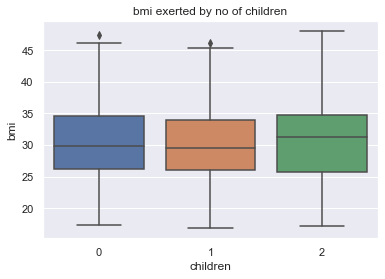

In [25]:
sns.boxplot(x = "children", y = "bmi", data =women_df)
plt.title('bmi exerted by no of children')
plt.show()

Graph insights:
it seems that women with 2 children have an avg higher bmi and a more right asymmetrical 
while women with no child and one child are left asymmetrical and almost have the same avg bmi.
no child and one child women both have one outlier

In [78]:
z, pval = weightstats.ztest(Nochild_women_df['bmi'],onechild_women_df['bmi'])
z,pval
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. So we reject the null')
else:
    print(f'With a p-value of {pval} the difference is not significant. so we fail to reject the null')

With a p-value of 0.5969846285544627 the difference is not significant. so we fail to reject the null


# Hypothesis
Null hypothesis Ho: 𝜇1  =  𝜇2  =  𝜇3
    
Alternative hypothesis Ha: At least one  𝜇  differs
    
here 𝜇1, 𝜇2,𝜇3 are the mean bmi for the women with no child, one child and two child respetively


# ANOVA (f-test)

α = 0.05

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different.
ANOVA uses F-tests to statistically test the equality of means.

In [29]:
# Calculate the p value using ANOVA table
import statsmodels.api as sm
from   statsmodels.formula.api import ols
mod = ols('bmi ~ children', data = women_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


here, p value is 0.79376 and it is greater than our chosen level of signifance at 5%

So the statistical decision is to not reject the null hypothesis at 5% level of significance.

# Conclusion:

From ANOVA F-test, we can conclude that there is not any significant difference in women bmis w.r.t number of children since p value is higher than the significance level(5%).

so we accept the null hypothesis that there means are same.